# Data Distribution
## Exercise Instructions

* Complete all cells as instructed, replacing any ??? with the appropriate code

* Execute Jupyter **Kernel** > **Restart & Run All** and ensure that all code blocks run without error

## Description
You will explore three data distributions: uniform, normal, and t 

## R Features
* runif()
* rnorm()
* rt()
* geom_density()
* geom_histogram()
* ggpairs()
* Others: 
   * library()
   * head()
   * summary()
   * ggplot()
   * geom_point()
   * labs()
   * data_frame()
   * facet_wrap()
   * seq_along()
   * theme_classic()
   * bind_rows()
   * select_if()
   * is.numeric()

## Datasets
* sample from distributions
* mpg
* mtcars


In [1]:
# Load libraries
library(GGally)
library(tidyverse)

Loading required package: ggplot2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.2.5
✔ tidyr   1.0.0     ✔ dplyr   0.8.3
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ tibble  2.1.3     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Uniform distribution
The uniform distribution is the name given to what is commonly thought of when trying to simulate random numbers. Choosing a number between 1 and 100 at random, would refer to the uniform distribution. `It is called uniform because it has the same equal probability for any and all values across the range.` 2 is just as likely to be drawn as 50, or 99. 

Contrast that with Normal and T distributions where samples near their mean are more common than values near their tails. The distribution shape, communicates its probability. 

To sample from the uniform distribution you use the runif() function.

In [2]:
# Display help on runif
?runif()

# Uniform {stats}	R Documentation
The Uniform Distribution

## Description

These functions provide information about the uniform distribution on the interval from min to max. dunif gives the density, punif gives the distribution function qunif gives the quantile function and runif generates random deviates.

## Usage

dunif(x, min = 0, max = 1, log = FALSE)   
punif(q, min = 0, max = 1, lower.tail = TRUE, log.p = FALSE)   
qunif(p, min = 0, max = 1, lower.tail = TRUE, log.p = FALSE)   
runif(n, min = 0, max = 1)
## Arguments

* x, q	_ vector of quantiles.
* p	- vector of probabilities.
* n	_ number of observations. If length(n) > 1, the length is taken to be the number required.
* min, max	- lower and upper limits of the distribution. Must be finite.
* log, log.p	- logical; if TRUE, probabilities p are given as log(p).
* lower.tail	- logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x].

Notice the naming convention. 'unif' is short for uniform and represents the underlying probability shape. The first letter means:
* d - density
* p - probability
* q - quantile
* r - random

# Random uniform numbers
Let's generate some random uniform numbers and plot them.

In [3]:
# Generate 100 random uniform numbers
# Hint: runif()
v <- runif(n=100)

# Explore the first few results
v %>% head()

# Show summary of result
v %>% summary()

[1] 0.7848619 0.5726600 0.7785857 0.7268354 0.6032888 0.9805659

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.004941 0.182287 0.531818 0.497292 0.786520 0.998640 

Notice these values are all between 0 and 1. Let's change that to 0 and 100.

In [4]:
# Generate 100 random uniform numbers
# In range from 0 to 100
# Hint:runif()
v_unif <- runif(n=100, min= 0 , max= 100 )

# Explore the first few results
v_unif %>% head()

# Show summary of result
v_unif %>% summary()

[1] 63.72325 66.61891 53.67393 59.31618 72.25175 12.75174

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.485  27.149  53.679  52.785  79.590  99.284 

Notice that because the distribution is uniform, the mean will tend toward the middle of the given range. Let's plot it.

Warning message:
“`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session.”

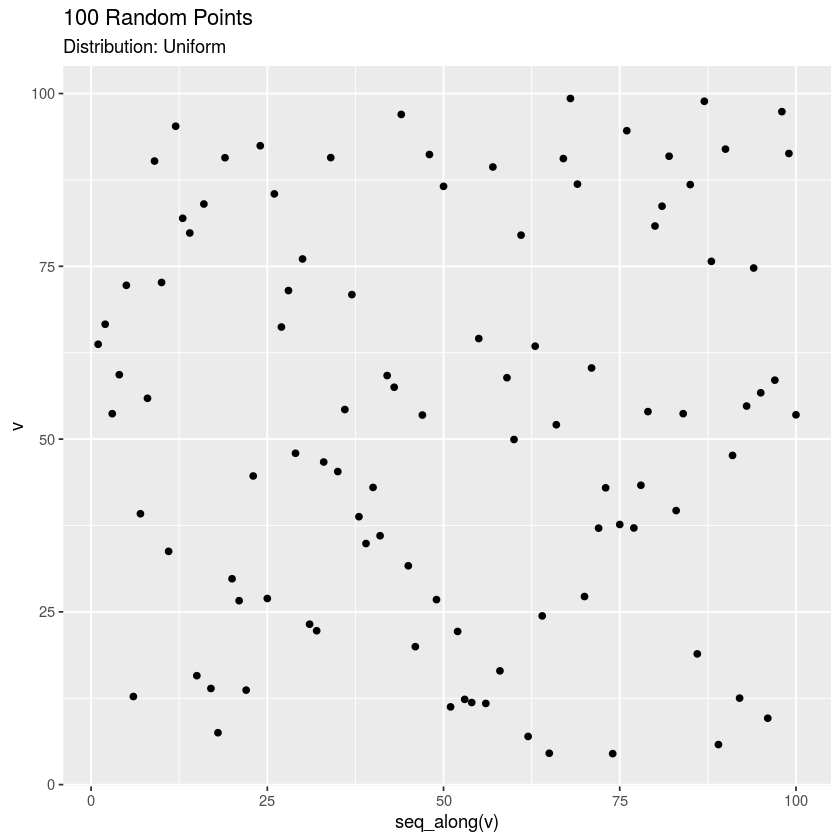

In [5]:
# Create a data frame in preparation to plotting
# Hint: data_frame
df_unif <- data_frame(v=v_unif, dist="Uniform")

# Use ggplot to plot these numbers
# Hint: seq_along(), geom_point()
df_unif %>% 
   ggplot(aes(x= seq_along(v), y=v)) + 
      geom_point() +
      labs(title="100 Random Points",
          subtitle="Distribution: Uniform")

# Normal distribution
The normal distribution is the bell curve. Following the naming convention, the function would be rnorm(). The normal distrubution is based on a distribution family with two parameters, mean, and standard deviation. We will need to supply these values if we don't want to use the standard defaults. 

Let's sample some data from this distribution and see what it looks like.

In [6]:
# Generate 100 random normal numbers
# Mean=50, Standard deviation=10
# Hint: rnorm()
v_norm <- rnorm (n= 100 , mean= 50 , sd= 10 )

# Explore the first few results
v_norm %>% head()

# Show summary of result
v_norm %>% summary()

[1] 52.31715 42.68911 38.63692 55.87584 48.39428 40.05446

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.46   44.45   51.10   51.04   57.60   77.36 

Notice that the mean is around 50 like uniform, but there is a big difference between normal and uniform. Can you spot it? . Let's plot it and it will become clear.

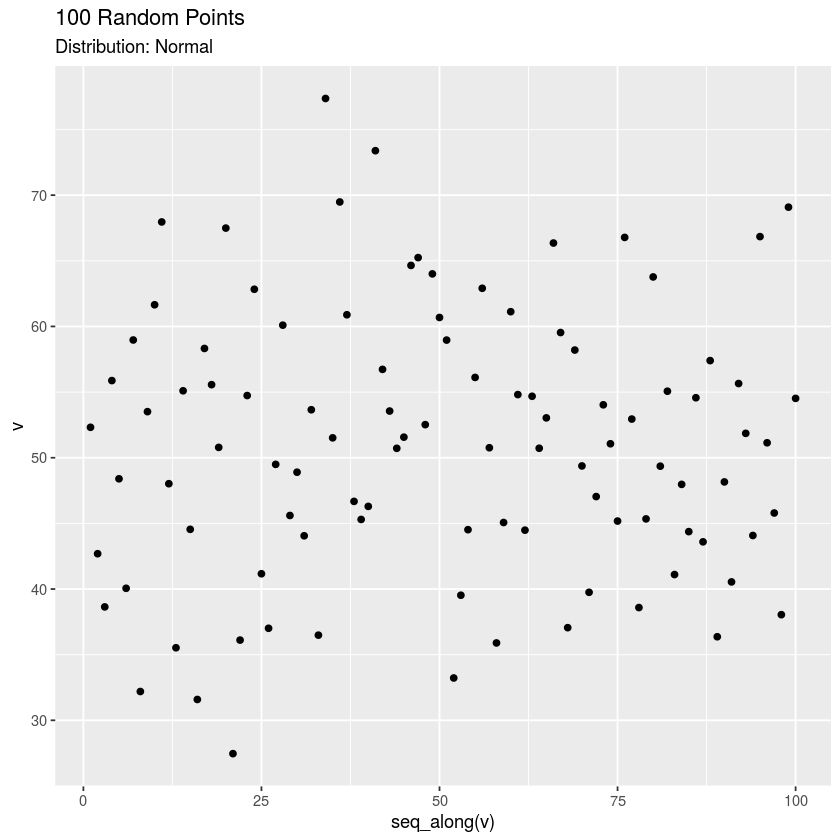

In [7]:
# Create a data frame in preparation to plotting
# Hint: data_frame
df_norm <- data_frame(v=v_norm, dist="Normal")

# Use ggplot to plot these numbers
# Hint: seq_along(), geom_point()
df_norm %>% 
   ggplot(aes(x= seq_along(v), y=v)) + 
      geom_point() +
      labs(title="100 Random Points",
          subtitle="Distribution: Normal")

Okay, so it isn't that easy to spot since ggplot auto adjusted each plot independently. Let's plot them together using facet.

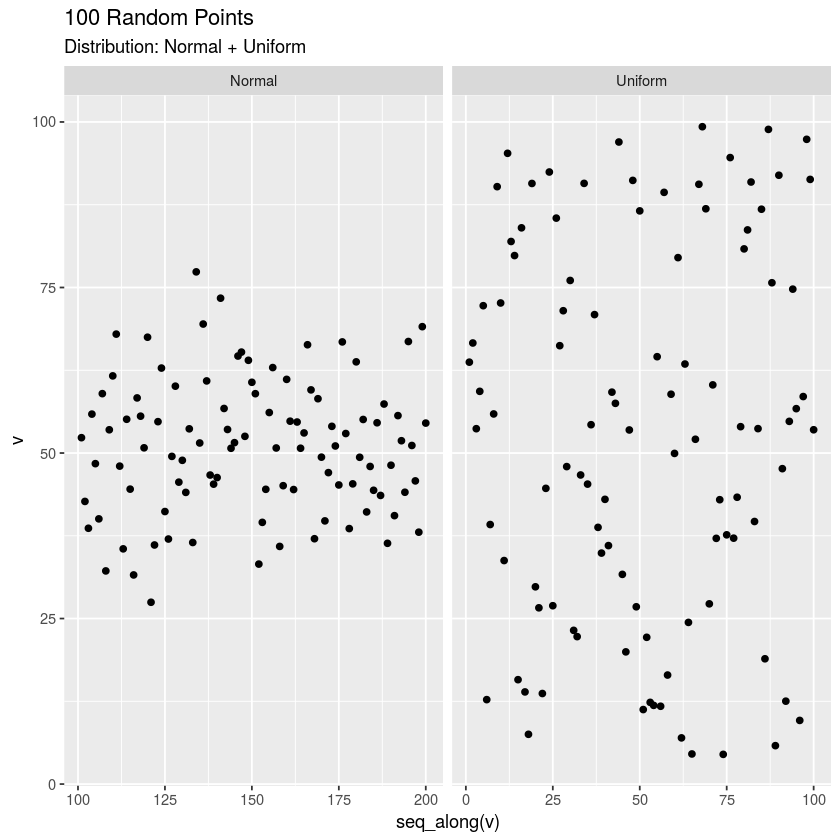

In [8]:
# Create a tidy dataframe containing both uniform and normal data
# Hint: bind_rows()
df_dist <- df_unif %>% bind_rows(df_norm)

# Scatterplot of samples facet on dist
# Hint: seq_along(), geom_point(), facet_wrap()
df_dist %>% 
   ggplot(aes(x= seq_along(v), y=v)) + 
      geom_point() +
      facet_wrap( ~ dist, scales="free_x") +
      labs(title="100 Random Points",
          subtitle="Distribution: Normal + Uniform")

It is a little clearer now that the normal distribution has its points closer to the mean compared to the uniform sample. This is still not the best plot type. We need a distribution plot to show the 'distribution'. What should we choose?

# Density plot
A Density distributions can be helpful to compare these two.

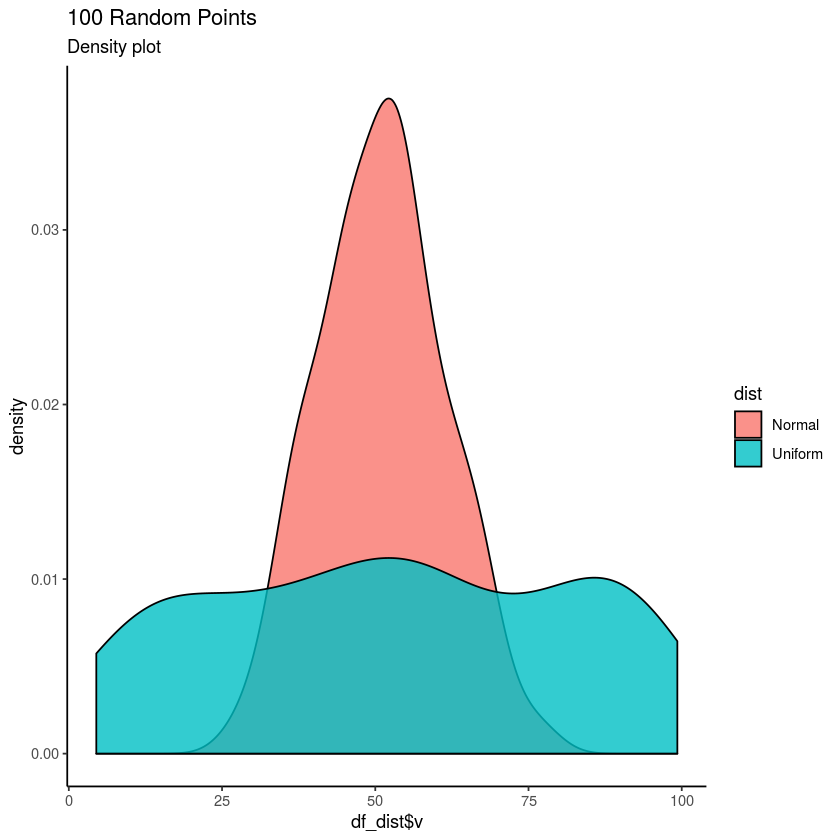

In [9]:
# Density of df_dist$v, fill=dist
# A density plot with alpha= 0.8
# Hint: geom_density() with alpha
df_dist %>% ggplot(aes(x= df_dist$v , fill= dist )) + 
   geom_density (alpha= 0.8 ) +
   theme_classic() +
   labs(title="100 Random Points",
       subtitle="Density plot")

They say to use the right tool for the right job...a density plot. It is clear that uniform does not have a peak in the middle, while normal definately does. Random isn't really random. It all depends on the distribution it is drawn from.

If you wanted to show off, you could plot both histogram and density plot together. Do you think you can do it?

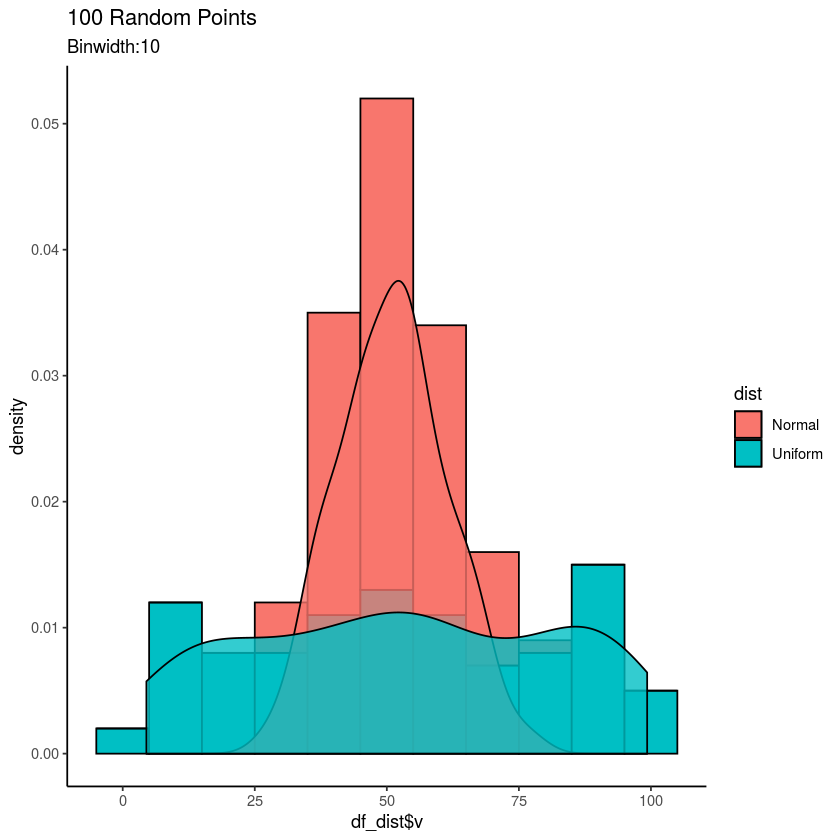

In [16]:
# Histogram and Density of df_dist$v, fill=dist
# A density plot with alpha= 0.8
# A histogram with color="black" and binwidth of 10
# Hint: geom_density() with alpha
# Hint: geom_histogram(mapping = aes(y=..density..), ...)
bw <- 10
df_dist %>% ggplot(aes(x=df_dist$v, fill=dist)) +
    geom_histogram(mapping = aes( y=..density..) , binwidth=bw, color="black") +
    geom_density(alpha=0.8)+
    theme_classic() +
    labs(title="100 Random Points",
       subtitle=str_c("Binwidth:", bw))

# T distribution
The T distribution is almost indistinguishable from the Normal distribution unless the sample count is very low. Less than 30. 

Let's sample from the T distribution for a sample of 10. Hopefully we will see a difference when comparing to the Normal distribtion later.

In [17]:
# Generate 100 random t numbers
# ncp=50 (mean), df=9 (degrees of freedom)
# Hint: rt()
v_t <- rt (n= 100 , df= 9 , ncp= 50)

# Explore the first few results
v_t %>% head()

# Show summary of result
v_t %>% summary()

[1] 106.12735  75.56220  36.44089  40.31443  39.50589  35.79942

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.89   48.75   55.71   57.82   65.87  106.13 

Comparing this to the Normal distribution and the Uniform distribution, can you spot the difference? It looks a bit like the Uniform distribution looking at the min and max values. Strange because it is supposed to look similar to the Normal distribution, not the Uniform distribution. 

Let's plot it and see. 

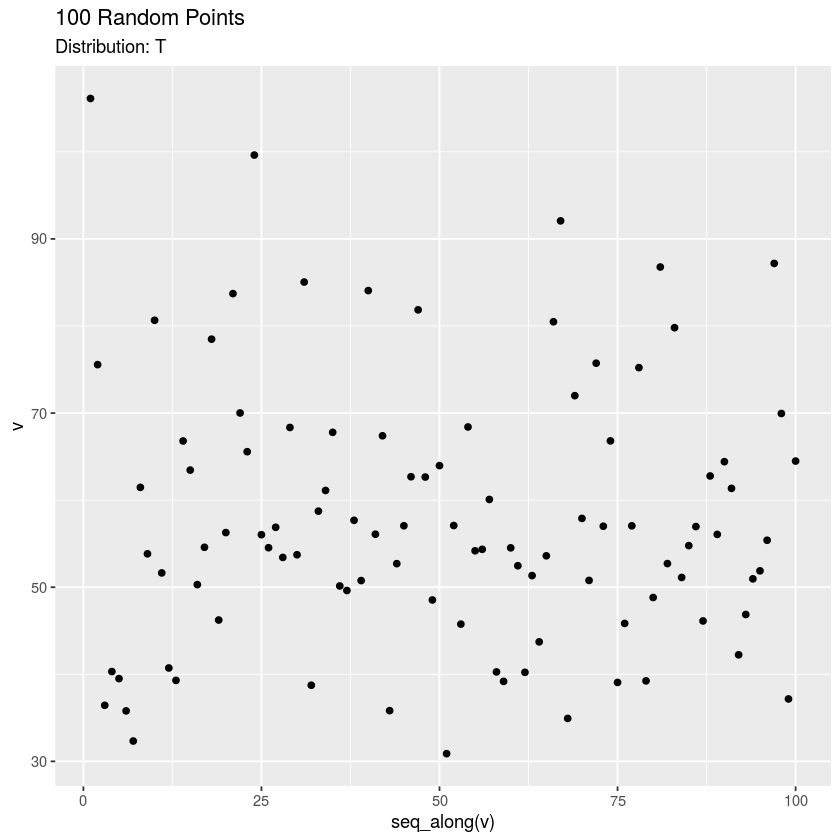

In [19]:
# Create a data frame in preparation to plotting
# Hint: data_frame
df_t <- data_frame (v=v_t, dist="T")

# Use ggplot to plot these numbers
# Hint: seq_along(), geom_point()
df_t %>% 
   ggplot(aes(x= seq_along(v), y=v)) + 
      geom_point() +
      labs(title="100 Random Points",
          subtitle="Distribution: T")

Your data will look differently than this, but it might have a large outlier or two that was more unlikely in the Normal distribution. Let's compare them with scatter and density plots.

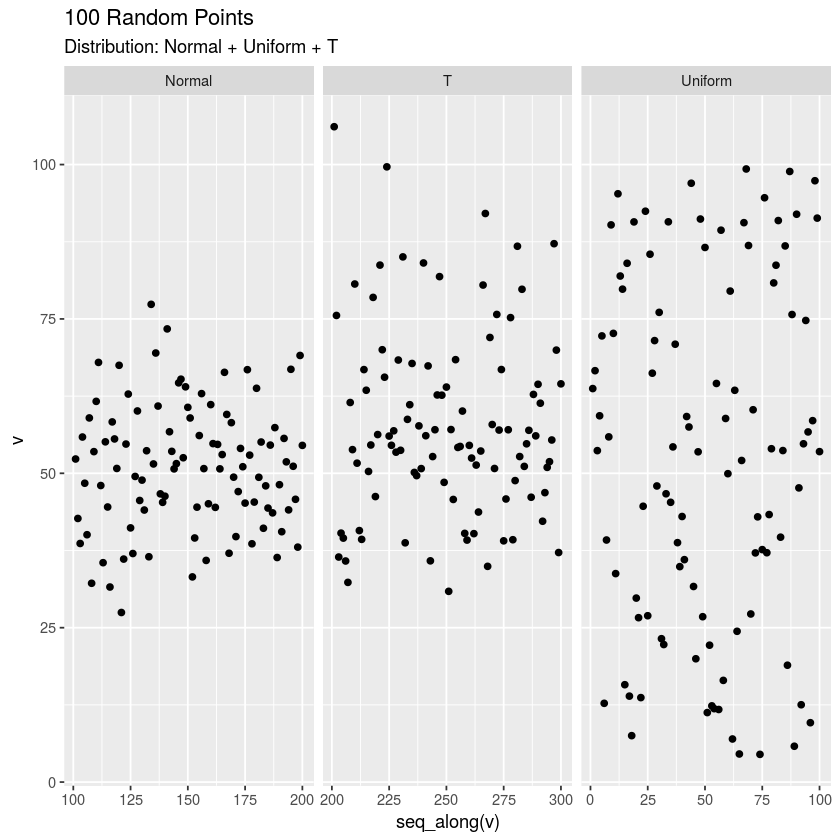

In [20]:
# Create a tidy dataframe containing uniform, normal, and t data
# Hint: bind_rows()
df_dist <- df_unif %>% bind_rows(df_norm) %>% bind_rows(df_t)

# Scatterplot of samples facet on dist
# Hint: seq_along(), geom_point(), facet_wrap()
df_dist %>% 
   ggplot(aes(x= seq_along(v), y=v)) + 
      geom_point() +
      facet_wrap ( ~ dist, scales="free_x") +
      labs(title="100 Random Points",
          subtitle="Distribution: Normal + Uniform + T")

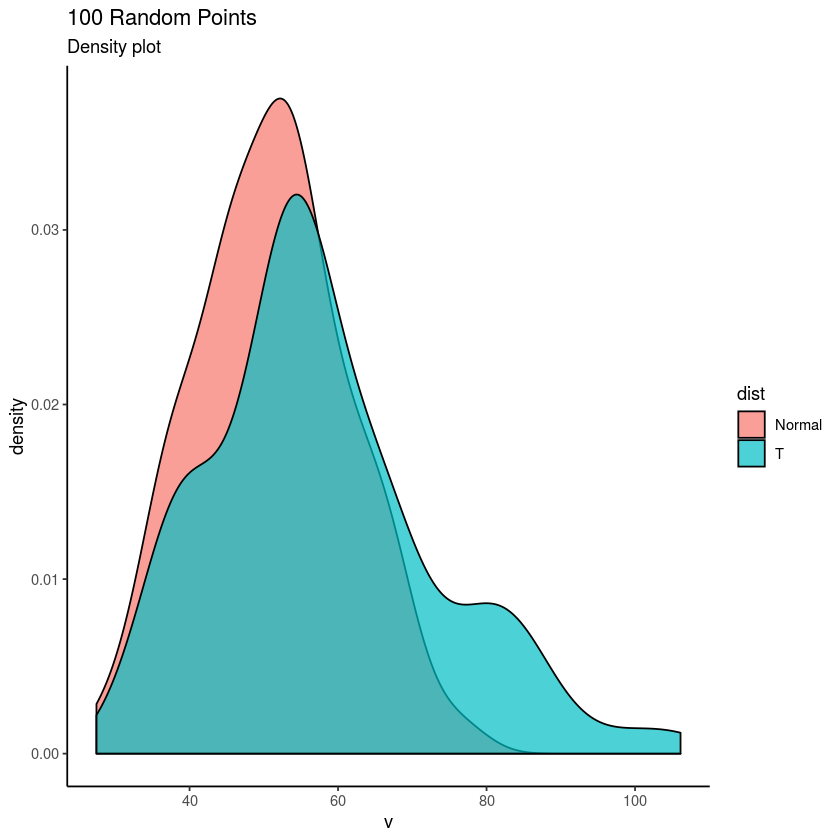

In [21]:
# Density of df_dist$v, fill=dist
# A density plot with alpha = 0.7
# Filter on Normal and T (exclude uniform to reduce plot clutter) 
# Hint: filter(), geom_density() with alpha
df_dist %>% 
   filter(dist %in% c( 'Normal' , 'T' )) %>% 
   ggplot(aes(x=v, fill=dist)) + 
      geom_density (alpha=0.7) +
      theme_classic() +
      labs(title="100 Random Points",
          subtitle="Density plot")

Now it is clear that the T distribution is very similar in shape to the Normal distribution. Two key differences hopefully showed up in your random sample. The first is that the peak of the T distribution isn't as high as the peak for the normal distribution. Secondly, the T distribution tails should be slightly more spread out compared to Normal. 

# Distributions using ggpairs
ggpairs is helpful to quickly show distributions in your dataframe similar to a density facet grid plot. It is in the GGally library. This is one of many extension packages to ggplot. If you only use this one function from GGally, it might make sense to fully qualify the function call with GGally::ggpairs() so you don't have to load the library, risking naming conflict with other libraries you might be using.

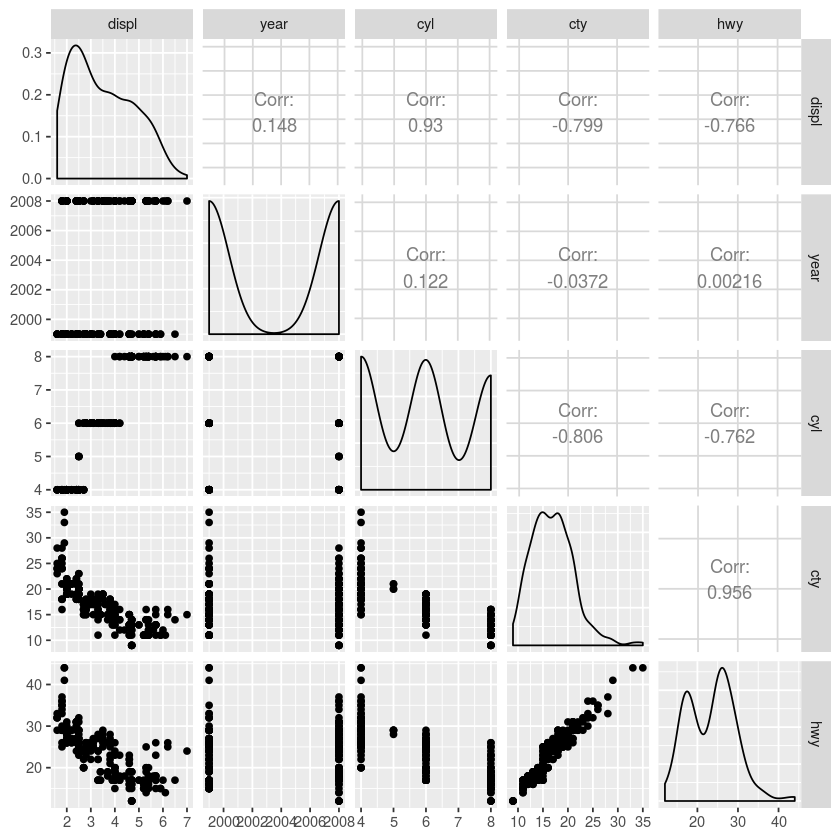

In [22]:
# Run the ggpairs on the numeric columns of mpg
# Hint: GGally::ggpairs(), select_if(), is.numeric()
mpg %>% 
   select_if(is.numeric ) %>% 
   GGally:: ggpairs()

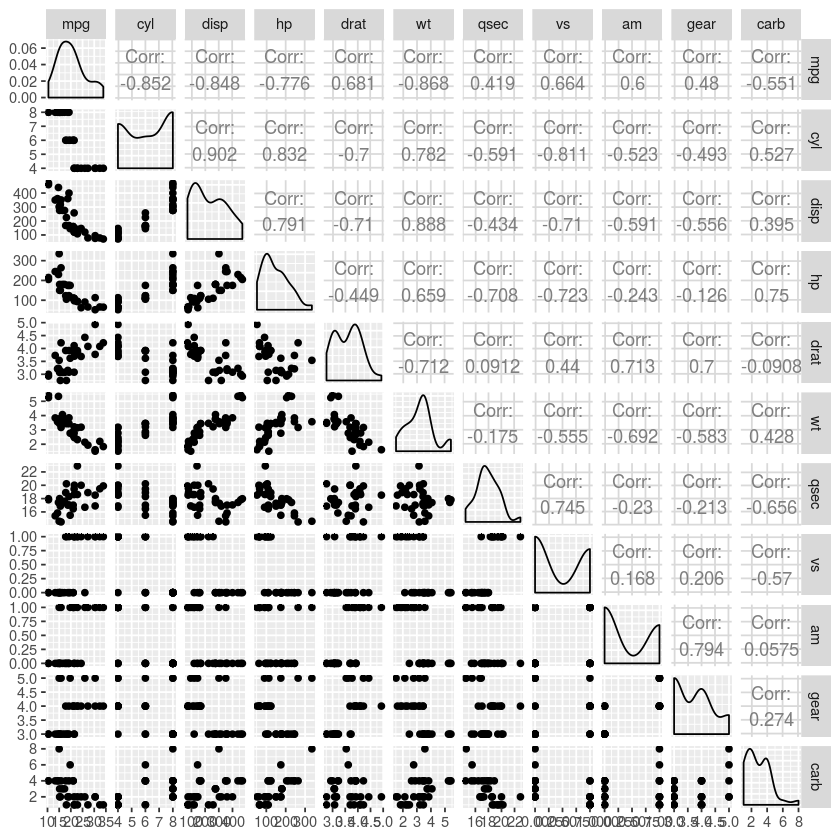

In [23]:
# Run the ggpairs on the numeric columns of mtcars
# Hint: GGally::ggpairs(), select_if(), is.numeric()
mtcars %>% 
   select_if(is.numeric) %>% 
   GGally::ggpairs()

What sort of distribution is miles per gallon? There is mpg\$cty, mpg\$hwy and mtcars\$mpg. They all seem to have some similarities. 

# Summary

We explored three distributions: Uniform, Normal, and T by taking random samples of each and comparing statistics as well as visually. R makes it easy to both generate random samples and be able to visually inspect data to see what type of distribution it is. We ended with the use of ggpairs which makes it easy to see distributions of the columns in a dataframe.